In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/RNN/Frozen_Dessert_Production.csv',parse_dates = True, index_col = 'DATE')

In [ ]:
df.columns = ['Sales']

In [ ]:
df

,Sales
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


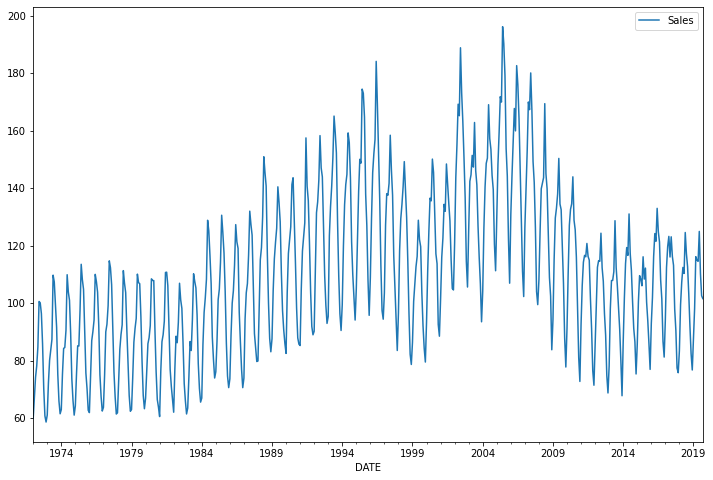

In [ ]:
df.plot(figsize = (12,8))

In [ ]:
len(df)

573

In [ ]:
test_size = 18
test_ind = len(df) - test_size

In [ ]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)

In [ ]:
scaled_test = scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
len(test)

18

In [ ]:
length = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length = length,batch_size = 1)

In [ ]:
X,y = generator[0]

In [ ]:
# X

array([[[0.00947104],
        [0.06108982],
        [0.11326273],
        [0.14145625],
        [0.18982663],
        [0.30495972],
        [0.30154406],
        [0.27416065],
        [0.19736841],
        [0.08532665],
        [0.01561588],
        [0.        ]]])

In [ ]:
# y

array([[0.01774221]])

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,LSTM

In [ ]:
n_features = 1

In [ ]:
model= Sequential()
model.add(LSTM(150,activation = 'relu', input_shape = (length,n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 150)               91200     
                                                                 
 dense_3 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss',patience = 2)

In [ ]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length = length , batch_size = 1)

In [ ]:
model.fit(generator,epochs = 20, validation_data = validation_generator,callbacks = [early_stop])

Epoch 1/20
561/561 [==============================] - 6s 9ms/step - loss: 0.0191 - val_loss: 0.0012
Epoch 2/20
561/561 [==============================] - 5s 8ms/step - loss: 0.0078 - val_loss: 0.0036
Epoch 3/20
561/561 [==============================] - 5s 8ms/step - loss: 0.0047 - val_loss: 0.0018


In [ ]:
losses = pd.DataFrame(model.history.history)

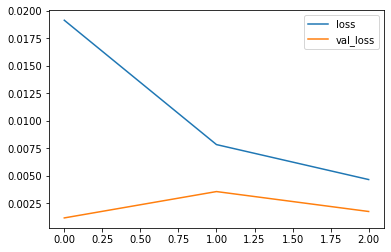

In [ ]:
losses.plot()

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  current_pred= model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test

,Sales,Predictions
DATE,,
2018-04-01,112.4309,115.781205
2018-05-01,110.3544,119.644397
2018-06-01,124.5841,121.163948
2018-07-01,117.2215,118.723290
2018-08-01,112.6779,112.183931
2018-09-01,103.3118,101.250922
2018-10-01,92.1321,91.685792
2018-11-01,82.4347,82.193603
2018-12-01,76.7608,81.274599


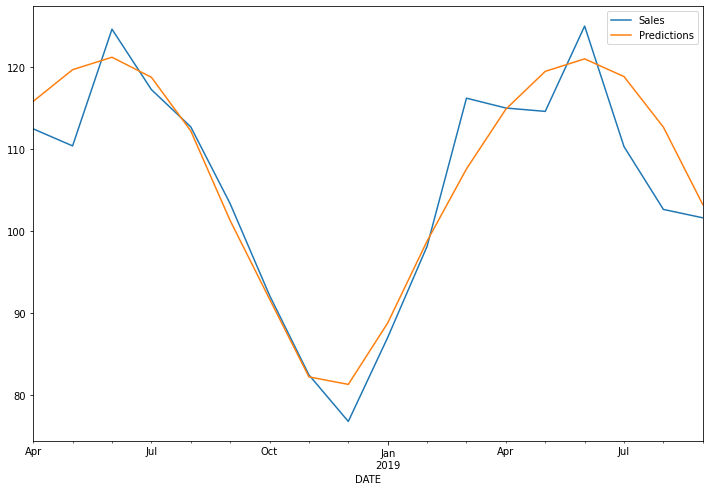

In [ ]:
test.plot(figsize = (12,8))

In [ ]:
 full_scaler = MinMaxScaler()
 scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
length = 12

generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,
                                length = length,batch_size =1)

In [ ]:
model = Sequential()
model.add(LSTM(100,activation = 'relu',input_shape = (length,n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mse')

model.fit_generator(generator,epochs = 5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


561/561 [==============================] - 5s 6ms/step - loss: 0.0232
Epoch 2/5
561/561 [==============================] - 3s 6ms/step - loss: 0.0104
Epoch 3/5
561/561 [==============================] - 3s 6ms/step - loss: 0.0062
Epoch 4/5
561/561 [==============================] - 3s 6ms/step - loss: 0.0051
Epoch 5/5
561/561 [==============================] - 4s 6ms/step - loss: 0.0043


In [ ]:
forecast = []

periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):

  current_pred = model.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

In [ ]:
 forecast = scaler.inverse_transform(forecast)

In [ ]:
df

,Sales
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [ ]:
forecast

array([[ 97.156426  ],
       [ 89.92213597],
       [ 89.37748482],
       [ 98.99506161],
       [111.07953116],
       [122.09906653],
       [127.39507444],
       [133.39644983],
       [134.94049212],
       [126.85024707],
       [120.45949441],
       [115.25608199]])

In [ ]:
forecast_index = pd.date_range(start = '2019-09-01',periods = periods,
                               freq = 'MS')

In [ ]:
forecast_index

DatetimeIndex(['2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
forecast_df = pd.DataFrame(data = forecast,index = forecast_index,columns = ['Forecast'])

In [ ]:
forecast_df

,Forecast
2019-09-01,97.156426
2019-10-01,89.922136
2019-11-01,89.377485
2019-12-01,98.995062
2020-01-01,111.079531
2020-02-01,122.099067
2020-03-01,127.395074
2020-04-01,133.396450
2020-05-01,134.940492
2020-06-01,126.850247


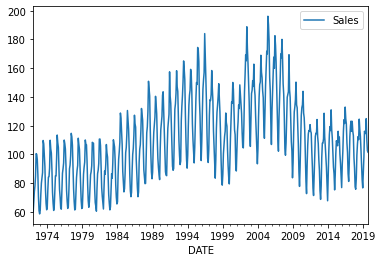

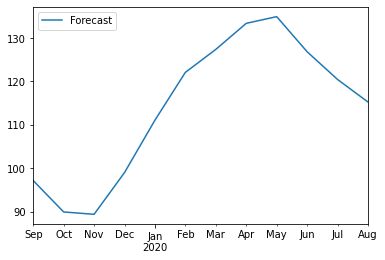

In [ ]:
df.plot()
forecast_df.plot()

(576.0, 607.0)

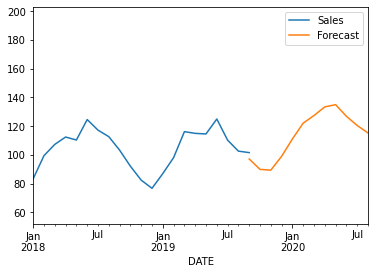

In [ ]:
ax = df.plot()
forecast_df.plot(ax =ax)
plt.xlim('2018-01-01','2020-08-01')